In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
# !pip install cliffs_delta
from cliffs_delta import cliffs_delta
from scipy.stats import wilcoxon
from numpy import median,mean
from tqdm import tqdm
import sqlite3,os,re
from IPython.display import display
from datetime import datetime
from math import log10, floor
import math
from statistics import mean
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

In [2]:
cate = {'Ac':'Accessibility',
'Bl':'Blogging',
'De':'Developer Tools',
'Fu':'Fun',
'Ne':'News & Weather',
'Ph':'Photos',
'Pr':'Productivity',
'Se':'Search Tools',
'Sh':'Shopping',
'So':'Social & Communication',
'Sp':'Sports'}
extensions = {
    #None
    'felcpnemckonbbmnoakbjgjkgokkbaeo':{'category':'Sh','label':-1,'pp':0,'target':'Shoppingjp2'},
'gfbepnlhpkbgbkcebjnfhgjckibfdfkc':{'category':'Sp','label':-1,'pp':0,'target':'Espn2'},
'fdpohaocaechififmbbbbbknoalclacl':{'category':'De','label':-1,'pp':0,'target':'Generic2'},
'pcpjpdomcbnlkbghmchnjgeejpdlonli':{'category':'Bl','label':-1,'pp':0,'target':'Generic2'},
'ammjkodgmmoknidbanneddgankgfejfh':{'category':'So','label':-1,'pp':0,'target':'Video_youtube2'},
'mefgmmbdailogpfhfblcnnjfmnpnmdfa':{'category':'Ne','label':-1,'pp':0,'target':'Lichess2'},
'eimadpbcbfnmbkopoojfekhnkhdbieeh':{'category':'Ac','label':-1,'pp':0,'target':'Generic2'},
'fbgcedjacmlbgleddnoacbnijgmiolem':{'category':'Se','label':-1,'pp':0,'target':'Generic2'},
'cnpniohnfphhjihaiiggeabnkjhpaldj':{'category':'Ph','label':-1,'pp':0,'target':'Generic2'},
'ogdlpmhglpejoiomcodnpjnfgcpmgale':{'category':'Fu','label':-1,'pp':0,'target':'Generic2'},
'cmedhionkhpnakcndndgjdbohmhepckk':{'category':'Pr','label':-1,'pp':0,'target':'Video_youtube2'},
    #12
'fmidkjgknpkbmninbmklhcgaalfalbdh':{'category':'Ac','label':0,'pp':1,'target':'Generic'},
'ffnhmkgpdmkajhomnckhabkfeakhcamm':{'category':'Bl','label':0,'pp':1,'target':'Generic'},
'gppongmhjkpfnbhagpmjfkannfbllamg':{'category':'De','label':0,'pp':1,'target':'Generic'},
'iginnfkhmmfhlkagcmpgofnjhanpmklb':{'category':'Fu','label':0,'pp':1,'target':'Generic'},
'kpghljlpdknmomchobaoecdlkcpocaga':{'category':'Ne','label':0,'pp':1,'target':'News'},
'lamfengpphafgjdgacmmnpakdphmjlji':{'category':'Ph','label':0,'pp':1,'target':'Generic'},
'gpdjojdkbbmdfjfahjcgigfpmkopogic':{'category':'Pr','label':0,'pp':1,'target':'Generic'},
'bmhcbmnbenmcecpmpepghooflbehcack':{'category':'Se','label':0,'pp':1,'target':'Generic'},
'pgmbeccjfkdbpdjfoldaahpfamjjafma':{'category':'Sh','label':0,'pp':1,'target':'Shoppingjp'},
'cimpffimgeipdhnhjohpbehjkcdpjolg':{'category':'So','label':0,'pp':1,'target':'Video_youtube'},
'ahcblhpcealjpkmndgmkdnebbjakicno':{'category':'Sp','label':0,'pp':1,'target':'Espn'},
    'pgniedifoejifjkndekolimjeclnokkb':{'category':'Fu','label':0,'pp':1,'target':'Video_twitch'},
    
    #11
'gmopgnhbhiniibbiilmbjilcmgaocokj':{'category':'Ac','label':1,'pp':2,'target':'Video_youtube'},
'ffjnfifmelbmglnajefiipdeejghkkjg':{'category':'Bl','label':1,'pp':2,'target':'Generic'},
'bkhaagjahfmjljalopjnoealnfndnagc':{'category':'De','label':1,'pp':2,'target':'GitHub'},
'ikdgincnppajmpmnhfheflannaiapmlm':{'category':'Fu','label':1,'pp':2,'target':'Generic'},
'kfimphpokifbjgmjflanmfeppcjimgah':{'category':'Ne','label':1,'pp':2,'target':'Generic'},
'lcpkicdemehhmkjolekhlglljnkggfcf':{'category':'Ph','label':1,'pp':1,'target':'Generic'},
'nngceckbapebfimnlniiiahkandclblb':{'category':'Pr','label':1,'pp':2,'target':'Generic'},
'naankklphfojljboaokgfbheobbgenka':{'category':'Se','label':1,'pp':2,'target':'Generic'},
'fhjanlpjlfhhbhbnjohflphmfccbhmoi':{'category':'Sh','label':1,'pp':2,'target':'Shoppingjp'},
'bkkjeefjfjcfdfifddmkdmcpmaakmelp':{'category':'So','label':1,'pp':2,'target':'Video_youtube'},
'lokmacldfjfgajcebibmmfohacnikhhd':{'category':'Sp','label':1,'pp':1,'target':'Draftkings'},
    #13
'alncdjedloppbablonallfbkeiknmkdi':{'category':'Ac','label':2,'pp':1,'target':'Generic'},
'pkihbahhbihfoebgdfkibnblbhjfgefc':{'category':'Bl','label':2,'pp':1,'target':'Apk'},
'dapjbgnjinbpoindlpdmhochffioedbn':{'category':'De','label':2,'pp':1,'target':'Generic'},
'fadndhdgpmmaapbmfcknlfgcflmmmieb':{'category':'Fu','label':2,'pp':1,'target':'Video_twitch'},
'iolcbmjhmpdheggkocibajddahbeiglb':{'category':'Ne','label':2,'pp':1,'target':'Generic'},
'mpejojclnbakefnlfmnkaaianojbicdk':{'category':'Ph','label':2,'pp':1,'target':'Generic'},
'mmeijimgabbpbgpdklnllpncmdofkcpn':{'category':'Pr','label':2,'pp':1,'target':'Generic'},
'aookogakccicaoigoofnnmeclkignpdk':{'category':'Se','label':2,'pp':1,'target':'Generic'},
'neebplgakaahbhdphmkckjjcegoiijjo':{'category':'Sh','label':2,'pp':1,'target':'Shoppingjp'},
'jicldjademmddamblmdllfneeaeeclik':{'category':'So','label':2,'pp':1,'target':'Oktool'},
'mlfkmhibffpoleieiomjkekmjipdekhg':{'category':'Sp','label':2,'pp':1,'target':'Video_youtube'},
    'jiiidpmjdakhbgkbdchmhmnfbdebfnhp':{'category':'De','label':2,'pp':1,'target':'Generic'},
    'behkgahlidmeemjefcbgieigiejiglpc':{'category':'Ne','label':2,'pp':1,'target':'Generic'},
    #11
'kammdlphdfejlopponbapgpbgakimokm':{'category':'Ac','label':3,'pp':2,'target':'Generic'},
'fnhmjceoafkkibpijbfpfajbhkknadmb':{'category':'Bl','label':3,'pp':4,'target':'Tricky'},
'fklgmciohehgadlafhljjhgdojfjihhk':{'category':'De','label':3,'pp':2,'target':'Generic'},
'jpefkkpmalfnilnbghfnjodceifpemdb':{'category':'Fu','label':3,'pp':2,'target':'Ereality'},
'pgfokhpgehbmeifbpdhegfnpaahabfja':{'category':'Ne','label':3,'pp':2,'target':'News'},
'aiiimepjikpdipbpmknolbnjbeohbmaa':{'category':'Ph','label':3,'pp':2,'target':'Generic'},
'jbebkmmlkhioeagiekpopmeecaepaihd':{'category':'Pr','label':3,'pp':2,'target':'Generic'},
'didkfdopbffjkpolefhpcjkohcpalicd':{'category':'Se','label':3,'pp':2,'target':'Generic'},
'pbjikboenpfhbbejgkoklgkhjpfogcam':{'category':'Sh','label':3,'pp':3,'target':'Shoppingjp'},
'mhkhmbddkmdggbhaaaodilponhnccicb':{'category':'So','label':3,'pp':2,'target':'Video_youtube'},
'lipplpkgbnhdfdchoibgafjdblpjdkpi':{'category':'Sp','label':3,'pp':3,'target':'Lichess'},
    #14
'bkpenclhmiealbebdopglffmfdiilejc':{'category':'Ac','label':4,'pp':1,'target':'Generic'},
'lnphplhkejidgcncalbkbngbiafmjnml':{'category':'Bl','label':4,'pp':1,'target':'Generic'},
'dgjhfomjieaadpoljlnidmbgkdffpack':{'category':'De','label':4,'pp':1,'target':'GitHub'},
'hcbddpppkcnfjifbcfnhmelpemdoepkk':{'category':'Fu','label':4,'pp':1,'target':'Generic'},
'kgaebnfbgpcnglnhjhglinfiecgccfij':{'category':'Ne','label':4,'pp':1,'target':'Generic'},
'iedjpcecgmldlnkbojiocmdaedhepbpn':{'category':'Ph','label':4,'pp':1,'target':'Generic'},
'nkbihfbeogaeaoehlefnkodbefgpgknn':{'category':'Pr','label':4,'pp':1,'target':'Generic'},
'eedlgdlajadkbbjoobobefphmfkcchfk':{'category':'Se','label':4,'pp':1,'target':'Generic'},
'gfkpklgmocbcbdabfellcnikamdaeajd':{'category':'Sh','label':4,'pp':2,'target':'Shoppingjp'},
'bboamecjefgpaemgfpcjeediamdnkklc':{'category':'So','label':4,'pp':1,'target':'Video_youtube'},
'kimjfkgkpmafgngclkdpjdlkdlghoikh':{'category':'Sp','label':4,'pp':1,'target':'Espn'},
    'bhggankplfegmjjngfmhfajedmiikolo':{'category':'Ac','label':4,'pp':1,'target':'Generic'},
    'ldjnabbinoccbodkejkdiolmadimbjkj':{'category':'Bl','label':4,'pp':2,'target':'Jobsalert'},
    'obhadkdgdffnnbdfpigjklinjhbkinfh':{'category':'Fu','label':4,'pp':2,'target':'Shadowpay'}
             }

# Normalization

## Extension-free normalization

In [ ]:
f = pd.read_csv('/xxxxxxxx/free.txt', sep=" ", header=None)[0]

free_cycle = pd.DataFrame()

for i in range(int(len(f)/7)):
    type = f[i*7]
    timestamp = f[i*7+1]
    time = f[i*7+2]
    core = f[i*7+3]
    dram = f[i*7+4]
    core5 = f[i*7+5]
    dram5 = f[i*7+6]
    loading = float(core)+float(dram)
    static = float(core5)+float(dram5)
    tmp = {'type':type,'time':time,'loading':loading,'static':static}
    free_cycle = pd.concat([free_cycle, pd.DataFrame([tmp])], ignore_index=True)

free = {'normal':{}}

for type in list(dict.fromkeys(free_cycle['type'])):
    time = free_cycle[free_cycle['type']==type]['time'].astype('float64')
    loading = free_cycle[free_cycle['type']==type]['loading'].astype('float64')
    static = free_cycle[free_cycle['type']==type]['static'].astype('float64')
    
    batch = 10
    batch_times = 10
    for i in range(batch):
        
        # # x/median Normalization
        # #  Normalize website by core/dram/...
        time.iloc[i*batch:i*batch+batch_times] = time[i*batch:i*batch+batch_times]/time[i*batch:i*batch+batch_times].median()
        loading.iloc[i*batch:i*batch+batch_times] = loading[i*batch:i*batch+batch_times]/loading[i*batch:i*batch+batch_times].median()
        static.iloc[i*batch:i*batch+batch_times] = static[i*batch:i*batch+batch_times]/static[i*batch:i*batch+batch_times].median()
        
       
    free['normal'][type] = {'time':time,'loading':loading,'static':static}
    
    Ntime = []
    Nloading = []
    Nstatic = []
    for i in range(batch):
        Ntime.append(free['normal'][type]['time'][i*batch:i*batch+batch_times].mean())
        Nloading.append(free['normal'][type]['loading'][i*batch:i*batch+batch_times].mean())
        Nstatic.append(free['normal'][type]['static'][i*batch:i*batch+batch_times].mean())

free_cycle

,type,time,loading,static
0,generic,0.428257,5928.452,237941.407
1,generic,0.364277,5348.985,231547.320
2,generic,0.412332,6923.932,231635.210
3,generic,0.455219,5729.906,233638.317
4,generic,0.384259,5570.176,230966.694
...,...,...,...,...
1995,lichess2,0.167082,1623.653,226278.778
1996,lichess2,0.167598,1602.290,228520.045
1997,lichess2,3.368991,15962.788,226232.209
1998,lichess2,0.171532,1810.602,226412.385


## Normalization - fully loaded mode

In [4]:
f = pd.read_csv('/xxxxxxxx/full.txt', sep=" ", header=None)[0]

full = pd.DataFrame()
for i in range(int(len(f)/7)):
    id = f[i*7]
    timestamp = f[i*7+1]
    time = f[i*7+2]
    core = f[i*7+3]
    dram = f[i*7+4]
    core5 = f[i*7+5]
    dram5 = f[i*7+6]
    loading = float(core)+float(dram)
    static = float(core5)+float(dram5)
    target=extensions[id]['target']
    tmp = {'id':id,
           'category':cate[extensions[id]['category']],
           'label':extensions[id]['label'],
           '#pp':extensions[id]['pp'],
           'target':target.lower(),
           'otime':time,
           'oloading':loading,'ostatic':static
          }
    full = pd.concat([full, pd.DataFrame([tmp])], ignore_index=True)  

for type in list(dict.fromkeys(full['target'])):
    id_list = list(dict.fromkeys(full[full['target']==type]['id']))
    
    
    time_base = free_cycle[free_cycle['type']==type]['time'].astype('float64')
    loading_base = free_cycle[free_cycle['type']==type]['loading'].astype('float64')
    static_base = free_cycle[free_cycle['type']==type]['static'].astype('float64')

    # # extensions in different web types
    for id in id_list:
        idx = full.index[full['id']==id]
        
        batch = idx[0]
        batch_times = 10
        for i in range(batch_times):
            
            # # Normalize x/median by website based on free version
            full.loc[batch+i*batch_times:batch+i*batch_times+batch_times-1,'time'] = full[full['id']==id]['otime'][i*batch_times:i*batch_times+batch_times].astype('float64')/time_base[i*batch_times:i*batch_times+batch_times].median()
            full.loc[batch+i*batch_times:batch+i*batch_times+batch_times-1,'loading'] = full[full['id']==id]['oloading'][i*batch_times:i*batch_times+batch_times].astype('float64')/loading_base[i*batch_times:i*batch_times+batch_times].median()
            full.loc[batch+i*batch_times:batch+i*batch_times+batch_times-1,'static'] = full[full['id']==id]['ostatic'][i*batch_times:i*batch_times+batch_times].astype('float64')/static_base[i*batch_times:i*batch_times+batch_times].median()
    
print(len(full[full.time.isna() | full.loading.isna() | full.static.isna()]))
full.sort_values(by=['label','category'])

0


,id,category,label,#pp,target,otime,oloading,ostatic,time,loading,static
6700,eimadpbcbfnmbkopoojfekhnkhdbieeh,Accessibility,-1,0,generic2,0.371232,7680.949,238263.062,1.070140,1.421295,1.026560
6701,eimadpbcbfnmbkopoojfekhnkhdbieeh,Accessibility,-1,0,generic2,0.354571,7028.303,231914.201,1.022112,1.300528,0.999206
6702,eimadpbcbfnmbkopoojfekhnkhdbieeh,Accessibility,-1,0,generic2,0.332592,6793.867,231895.037,0.958753,1.257148,0.999123
6703,eimadpbcbfnmbkopoojfekhnkhdbieeh,Accessibility,-1,0,generic2,0.356782,6902.570,231306.720,1.028485,1.277262,0.996588
6704,eimadpbcbfnmbkopoojfekhnkhdbieeh,Accessibility,-1,0,generic2,0.348813,6976.422,234222.119,1.005513,1.290928,1.009149
...,...,...,...,...,...,...,...,...,...,...,...
5395,kimjfkgkpmafgngclkdpjdlkdlghoikh,Sports,4,1,espn,0.657412,20700.081,475661.258,0.733292,0.931296,1.070039
5396,kimjfkgkpmafgngclkdpjdlkdlghoikh,Sports,4,1,espn,0.795694,21570.624,455043.024,0.887535,0.970462,1.023656
5397,kimjfkgkpmafgngclkdpjdlkdlghoikh,Sports,4,1,espn,0.68738,20509.897,453349.974,0.766719,0.922740,1.019848
5398,kimjfkgkpmafgngclkdpjdlkdlghoikh,Sports,4,1,espn,0.679426,20321.786,460884.379,0.757847,0.914276,1.036797


## Change ratio - fully loaded mode

In [5]:
full_cycle = pd.DataFrame()
for id in list(dict.fromkeys(full['id'])):
    target =full[full['id']==id]['target'].tolist()[0].lower()
    
    # otime = full[full['id']==id]['otime'].astype('float64')
    # oloading = full[full['id']==id]['oloading'].astype('float64')
    # ostatic = full[full['id']==id]['ostatic'].astype('float64')
    
    time = full[full['id']==id]['time'].astype('float64')
    loading = full[full['id']==id]['loading'].astype('float64')
    static = full[full['id']==id]['static'].astype('float64')
    
    batch = 10
    batch_times = 10
    timeRatio = []
    loadingRatio = []
    staticRatio = []
    
    for i in range(batch):
        timeRatio.append((time.iloc[i*batch:i*batch+batch_times].median()-free['normal'][type]['time'][i*batch:i*batch+batch_times].median())/(free['normal'][type]['time'][i*batch:i*batch+batch_times]).median())
        loadingRatio.append((loading.iloc[i*batch:i*batch+batch_times].median()-free['normal'][type]['loading'][i*batch:i*batch+batch_times].median())/(free['normal'][type]['loading'][i*batch:i*batch+batch_times]).median())
        staticRatio.append((static.iloc[i*batch:i*batch+batch_times].median()-free['normal'][type]['static'][i*batch:i*batch+batch_times].median())/(free['normal'][type]['static'][i*batch:i*batch+batch_times]).median())

    tmp = {'id':id,
           'category':cate[extensions[id]['category']],
           'label':extensions[id]['label'],
           '#pp':extensions[id]['pp'],
           'target':target,
           'Median-timeRatio':mean(timeRatio)*100,
           'Median-loadingRatio':mean(loadingRatio)*100,
           'Median-staticRatio':mean(staticRatio)*100,
          }
    full_cycle = pd.concat([full_cycle, pd.DataFrame([tmp])], ignore_index=True) 

full_cycle.sort_values(by=['label','category'])

,id,category,label,#pp,target,Median-timeRatio,Median-loadingRatio,Median-staticRatio
67,eimadpbcbfnmbkopoojfekhnkhdbieeh,Accessibility,-1,0,generic2,87.161895,164.343595,7.370315
64,pcpjpdomcbnlkbghmchnjgeejpdlonli,Blogging,-1,0,generic2,61.397683,52.932248,3.978144
63,fdpohaocaechififmbbbbbknoalclacl,Developer Tools,-1,0,generic2,2.478947,2.200622,5.246518
70,ogdlpmhglpejoiomcodnpjnfgcpmgale,Fun,-1,0,generic2,14.312963,16.511963,2.962366
66,mefgmmbdailogpfhfblcnnjfmnpnmdfa,News & Weather,-1,0,lichess2,9.146788,7.575701,0.087368
...,...,...,...,...,...,...,...,...
56,nkbihfbeogaeaoehlefnkodbefgpgknn,Productivity,4,1,generic,20.829384,45.489994,0.404110
48,eedlgdlajadkbbjoobobefphmfkcchfk,Search Tools,4,1,generic,-2.768587,9.904450,0.873494
57,gfkpklgmocbcbdabfellcnikamdaeajd,Shopping,4,2,shoppingjp,-2.737459,17.643693,4.128524
60,bboamecjefgpaemgfpcjeediamdnkklc,Social & Communication,4,1,video_youtube,1.774749,6.647412,6.781221


## Statistically tests for the fully loaded mode

In [6]:
round_to_n = lambda x, sf: round(x, -int(floor(log10(abs(x)))) + (sf - 1) if sf else 2) if not math.isnan(x) else 0

def percChange(full_cycle2, interp):
    if interp == "all":
        # print("Small Cliff's d")
        printPercChange(full_cycle2, 0.147,1.1)
    if interp == "small":
        # print("Small Cliff's d")
        printPercChange(full_cycle2, 0.147,0.330)
    if interp == "median":
        # print("Median Cliff's d")
        printPercChange(full_cycle2, 0.330,0.474)
    if interp == "large":
        # print("Large Cliff's d")
        printPercChange(full_cycle2, 0.474,1.1)
            
def printPercChange(full_cycle2, lf, rt):
    for typ in ['time','loading','static']:
        numI = len(full_cycle2[(full_cycle2[f'Median-{typ}Ratio']>0) & (full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))])
        num = len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))])
        perc = round(numI/num*100,2) if num!=0 else 0
        
        print(len(full_cycle2[(full_cycle2[f'Median-{typ}Ratio']>0) & (full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))]), f' ({perc}%) {typ} in median increase by',
              round_to_n((full_cycle2[(full_cycle2[f'Median-{typ}Ratio']>0) & (full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))][f'Median-{typ}Ratio'].median()),2), '%')
        numI = len(full_cycle2[(full_cycle2[f'Median-{typ}Ratio']<0) & (full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))])
        num = len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))])
        perc = round(numI/num*100,2) if num!=0 else 0
        
        print(len(full_cycle2[(full_cycle2[f'Median-{typ}Ratio']<0) & (full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))]), f' ({perc}%) {typ} in median drop by',
              round_to_n((full_cycle2[(full_cycle2[f'Median-{typ}Ratio']<0) & (full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))][f'Median-{typ}Ratio'].median()),2), '%')
        print(len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))]), f' {typ} in median changes by',
              round_to_n((full_cycle2[(full_cycle2[f'mannwhitneyu-{typ}']<0.05) & (full_cycle2[f'cliffs_d-{typ}'].between(left=lf, right=rt, inclusive="left"))][f'Median-{typ}Ratio'].median()),2), '%')
        print('\n')
        
print('The Mann-Whitney U + cliff d')
for cd in range(4):
    print("Small Cliff's d \n") if cd ==1 else ''
    print("Median Cliff's d \n") if cd ==2 else ""
    print("Large Cliff's d \n") if cd ==3 else ''
    
    full_cycle2 = full_cycle.copy()
    for typ in ['time','loading','static']:
        for ext in list(full_cycle2['id']):
            target =full[full['id']==ext]['target'].tolist()[0].lower()
            ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))#,method='exact')
            # ws,wy = wilcoxon(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
            d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

            idx = full_cycle2.index[full_cycle2['id']==ext][0]
            full_cycle2.at[idx,f'mannwhitneyu-{typ}'] = round(wy,2)
            full_cycle2.at[idx,f'cliffs_d-{typ}'] = round(abs(d),2)

    percChange(full_cycle2, 'all') if cd ==0 else ''
    percChange(full_cycle2, 'small') if cd ==1 else ''
    percChange(full_cycle2, 'median') if cd ==2 else ""
    percChange(full_cycle2, 'large') if cd ==3 else ''    

The Mann-Whitney U + cliff d
22  (55.0%) time in median increase by 18.0 %
18  (45.0%) time in median drop by -6.3 %
40  time in median changes by 4.0 %


43  (93.48%) loading in median increase by 17.0 %
3  (6.52%) loading in median drop by -7.3 %
46  loading in median changes by 16.0 %


47  (88.68%) static in median increase by 1.8 %
6  (11.32%) static in median drop by -1.6 %
53  static in median changes by 1.6 %


Small Cliff's d 

11  (50.0%) time in median increase by 14.0 %
11  (50.0%) time in median drop by -4.2 %
22  time in median changes by 0.48 %


14  (100.0%) loading in median increase by 9.0 %
0  (0.0%) loading in median drop by 0 %
14  loading in median changes by 9.0 %


14  (77.78%) static in median increase by 1.4 %
4  (22.22%) static in median drop by -0.95 %
18  static in median changes by 1.0 %


Median Cliff's d 

3  (37.5%) time in median increase by 29.0 %
5  (62.5%) time in median drop by -9.0 %
8  time in median changes by -4.6 %


8  (80.0%) loading in medi

## Generalize the preprocessing procedures for other modes

In [7]:
def read_file(filename, type):
    nl = ['ffnhmkgpdmkajhomnckhabkfeakhcamm','gmopgnhbhiniibbiilmbjilcmgaocokj','kfimphpokifbjgmjflanmfeppcjimgah',
      'fhjanlpjlfhhbhbnjohflphmfccbhmoi','mmeijimgabbpbgpdklnllpncmdofkcpn', 'mlfkmhibffpoleieiomjkekmjipdekhg',
      'didkfdopbffjkpolefhpcjkohcpalicd']
    ng = ['behkgahlidmeemjefcbgieigiejiglpc']

    print(filename)
    f = pd.read_csv(f'/xxxxxxxx/{filename}.txt', sep=" ", header=None)[0]
    notGrant = pd.DataFrame()
    for i in range(int(len(f)/7)):
        id = f[i*7]
        timestamp = f[i*7+1]
        time = f[i*7+2]
        core = f[i*7+3]
        dram = f[i*7+4]
        core5 = f[i*7+5]
        dram5 = f[i*7+6]
        loading = float(core)+float(dram)
        static = float(core5)+float(dram5)
        # total = float(loading) + float(static)
        target=extensions[id]['target']
        if type == 'nl' and id in nl:
            target = target+'2'
        if type == 'ng' and id in ng:
            target = target +'2'
        tmp = {'id':id,
               'category':cate[extensions[id]['category']],
               'label':extensions[id]['label'],
               'pp':extensions[id]['pp'],
               'target':target.lower() if filename != 'inactive' else 'generic',
               'timestamp':timestamp,
               'otime':time,
            #    'ocore':core,'odram':dram,'ocore5':core5,'odram5':dram5,
               'oloading':loading,'ostatic':static
            #    ,'ototal': total
              }
        notGrant = pd.concat([notGrant, pd.DataFrame([tmp])], ignore_index=True) 
    print( len(dict.fromkeys(notGrant['id'])),'in total')
    return notGrant

def normalization(full):
    for type in list(dict.fromkeys(full['target'])):
        id_list = list(dict.fromkeys(full[full['target']==type]['id']))
        time_base = free_cycle[free_cycle['type']==type]['time'].astype('float64')
        loading_base = free_cycle[free_cycle['type']==type]['loading'].astype('float64')
        static_base = free_cycle[free_cycle['type']==type]['static'].astype('float64')
        # # extensions in different web types
        for id in id_list:
            idx = full.index[full['id']==id]
            batch = idx[0]
            batch_times = 10
            for i in range(batch_times):
                # # Normalize x/median by website based on free version
                full.loc[batch+i*batch_times:batch+i*batch_times+batch_times-1,'time'] = full[full['id']==id]['otime'][i*batch_times:i*batch_times+batch_times].astype('float64')/time_base[i*batch_times:i*batch_times+batch_times].median()
                full.loc[batch+i*batch_times:batch+i*batch_times+batch_times-1,'loading'] = full[full['id']==id]['oloading'][i*batch_times:i*batch_times+batch_times].astype('float64')/loading_base[i*batch_times:i*batch_times+batch_times].median()
                full.loc[batch+i*batch_times:batch+i*batch_times+batch_times-1,'static'] = full[full['id']==id]['ostatic'][i*batch_times:i*batch_times+batch_times].astype('float64')/static_base[i*batch_times:i*batch_times+batch_times].median()
    return full

def getRatio(notGrant,full,free):
    notGrant_cycle = pd.DataFrame()
    for id in list(dict.fromkeys(notGrant['id'])):
        target =notGrant[notGrant['id']==id]['target'].tolist()[0].lower()

        time = notGrant[notGrant['id']==id]['time'].astype('float64')
        loading = notGrant[notGrant['id']==id]['loading'].astype('float64')
        static = notGrant[notGrant['id']==id]['static'].astype('float64')
        
        fulltime = full[full.id==id]['time'].astype('float64')
        fullloading = full[full.id==id]['loading'].astype('float64')
        fullstatic = full[full.id==id]['static'].astype('float64')
        
        batch = 10
        batch_times = 10
        time2full = []
        loading2full = []
        static2full = []
        
        time2base = []
        loading2base = []
        static2base = []

        for i in range(batch):
            time2base.append((time.iloc[i*batch:i*batch+batch_times].median()-free['normal'][type]['time'][i*batch:i*batch+batch_times].median())/(free['normal'][type]['time'][i*batch:i*batch+batch_times]).median())
            loading2base.append((loading.iloc[i*batch:i*batch+batch_times].median()-free['normal'][type]['loading'][i*batch:i*batch+batch_times].median())/(free['normal'][type]['loading'][i*batch:i*batch+batch_times]).median())
            static2base.append((static.iloc[i*batch:i*batch+batch_times].median()-free['normal'][type]['static'][i*batch:i*batch+batch_times].median())/(free['normal'][type]['static'][i*batch:i*batch+batch_times]).median())
            
            time2full.append((time.iloc[i*batch:i*batch+batch_times].median()-fulltime[i*batch:i*batch+batch_times].median())/(fulltime[i*batch:i*batch+batch_times]).median())
            loading2full.append((loading.iloc[i*batch:i*batch+batch_times].median()-fullloading[i*batch:i*batch+batch_times].median())/(fullloading[i*batch:i*batch+batch_times]).median())
            static2full.append((static.iloc[i*batch:i*batch+batch_times].median()-fullstatic[i*batch:i*batch+batch_times].median())/(fullstatic[i*batch:i*batch+batch_times]).median())
        
        tmp = {'id':id,
               'category':cate[extensions[id]['category']],
               'label':extensions[id]['label'],
               '#pp':extensions[id]['pp'],
               'target':target,

               'time2base':mean(time2base)*100,
               'loading2base':mean(loading2base)*100,
               'static2base':mean(static2base)*100,
               
               'time2full':mean(time2full)*100,
               'loading2full':mean(loading2full)*100,
               'static2full':mean(static2full)*100
              }
        notGrant_cycle = pd.concat([notGrant_cycle, pd.DataFrame([tmp])], ignore_index=True)
    return notGrant_cycle

def stat_test(full_cycle2, full,fullload,free):
        
    print('Based on free version')
    print('The Mann-Whitney U + cliff d')
    for typ in ['time','loading','static']:
        for ext in list(full_cycle2['id']):
            target =full[full['id']==ext]['target'].tolist()[0].lower()
            # # Ext 2 Base
            ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
            d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

            idx = full_cycle2.index[full_cycle2['id']==ext][0]
            full_cycle2.at[idx,f'mannwhitneyu-{typ}2base'] = round(wy,2)
            full_cycle2.at[idx,f'cliffs_d-{typ}2base'] = round(abs(d),2)

    for typ in ['time','loading','static']:
        typ2 = typ
        lf=0.147
        rt=1.1
        
        numI =len(full_cycle2[(full_cycle2[f'{typ}2base']>0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
        num = len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
        perc = round(numI/num*100,2) if num!=0 else 0

        print(numI, f'({perc} %)', f' {typ} in median increase by',
              round_to_n((full_cycle2[(full_cycle2[f'{typ}2base']>0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))][f'{typ}2base'].median()),2), '%')

        numD =len(full_cycle2[(full_cycle2[f'{typ}2base']<0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
        num = len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
        perc = round(numD/num*100,2) if num!=0 else 0

        print(numD, f'({perc} %)', f' {typ} in median drop by',
              round_to_n((full_cycle2[(full_cycle2[f'{typ}2base']<0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))][f'{typ}2base'].median()),2), '%')
    
        print(len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))]), f' {typ} in median changes by',
              round_to_n((full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))][f'{typ}2base'].median()),2), '%')
        print('\n')
            
    for cd in range(3):
        if cd ==0:
            lf=0.147
            rt=0.330
            print("Small Cliff's d \n")
        if cd ==1:
            lf=0.330 
            rt=0.474
            print("Median Cliff's d \n")
        if cd ==2:
            lf=0.474 
            rt=1.1
            print("Large Cliff's d \n")
    
        for typ in ['time','loading','static']:
            typ2 = typ
            numI =len(full_cycle2[(full_cycle2[f'{typ}2base']>0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
            num = len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
            perc = round(numI/num*100,2) if num!=0 else 0

            print(numI, f'({perc} %)', f' {typ} in median increase by',
                  round_to_n((full_cycle2[(full_cycle2[f'{typ}2base']>0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))][f'{typ}2base'].median()),2), '%')
            
            numD =len(full_cycle2[(full_cycle2[f'{typ}2base']<0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
            num = len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))])
            perc = round(numD/num*100,2) if num!=0 else 0

            print(numD, f'({perc} %)', f' {typ} in median drop by',
                  round_to_n((full_cycle2[(full_cycle2[f'{typ}2base']<0) & (full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))][f'{typ}2base'].median()),2), '%')
            print(len(full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))]), f' {typ} in median changes by',
                  round_to_n((full_cycle2[(full_cycle2[f'mannwhitneyu-{typ2}2base']<0.05) & (full_cycle2[f'cliffs_d-{typ2}2base'].between(left=lf, right=rt, inclusive="left"))][f'{typ}2base'].median()),2), '%')
            print('\n')
        print('\n')

## Normalization - no Grant

In [8]:
notGrant=read_file('notGrant','ng')
notGrant = normalization(notGrant)
notGrant_cycle = getRatio(notGrant,full,free)
stat_test(notGrant_cycle, notGrant,full,free)

notGrant
13 in total
Based on free version
The Mann-Whitney U + cliff d
2 (33.33 %)  time in median increase by 43.0 %
4 (66.67 %)  time in median drop by -6.9 %
6  time in median changes by -6.3 %


8 (100.0 %)  loading in median increase by 7.5 %
0 (0.0 %)  loading in median drop by 0 %
8  loading in median changes by 7.5 %


12 (100.0 %)  static in median increase by 2.8 %
0 (0.0 %)  static in median drop by 0 %
12  static in median changes by 2.8 %


Small Cliff's d 

2 (40.0 %)  time in median increase by 43.0 %
3 (60.0 %)  time in median drop by -6.5 %
5  time in median changes by -6.2 %


6 (100.0 %)  loading in median increase by 4.3 %
0 (0.0 %)  loading in median drop by 0 %
6  loading in median changes by 4.3 %


2 (100.0 %)  static in median increase by 1.9 %
0 (0.0 %)  static in median drop by 0 %
2  static in median changes by 1.9 %




Median Cliff's d 

0 (0.0 %)  time in median increase by 0 %
1 (100.0 %)  time in median drop by -8.9 %
1  time in median changes by -8.9 

## Normalization - no Login

In [9]:
notLogin=read_file('notLogin','nl')
notLogin = normalization(notLogin)
notLogin_cycle = getRatio(notLogin,full,free)
stat_test(notLogin_cycle, notLogin,full,free)

notLogin
17 in total
Based on free version
The Mann-Whitney U + cliff d
4 (66.67 %)  time in median increase by 40.0 %
2 (33.33 %)  time in median drop by -4.8 %
6  time in median changes by 25.0 %


14 (100.0 %)  loading in median increase by 18.0 %
0 (0.0 %)  loading in median drop by 0 %
14  loading in median changes by 18.0 %


15 (100.0 %)  static in median increase by 2.9 %
0 (0.0 %)  static in median drop by 0 %
15  static in median changes by 2.9 %


Small Cliff's d 

3 (60.0 %)  time in median increase by 46.0 %
2 (40.0 %)  time in median drop by -4.8 %
5  time in median changes by 33.0 %


9 (100.0 %)  loading in median increase by 9.5 %
0 (0.0 %)  loading in median drop by 0 %
9  loading in median changes by 9.5 %


1 (100.0 %)  static in median increase by 0.57 %
0 (0.0 %)  static in median drop by 0 %
1  static in median changes by 0.57 %




Median Cliff's d 

0 (0 %)  time in median increase by 0 %
0 (0 %)  time in median drop by 0 %
0  time in median changes by 0 %


1 

## Normalization - Inactive (i.e., Non-designated)

In [10]:
inactive=read_file('inactive','ia')
inactive = normalization(inactive)
inactive_cycle = getRatio(inactive,full,free)
stat_test(inactive_cycle, inactive,full,free)

inactive
11 in total
Based on free version
The Mann-Whitney U + cliff d
4 (100.0 %)  time in median increase by 20.0 %
0 (0.0 %)  time in median drop by 0 %
4  time in median changes by 20.0 %


5 (100.0 %)  loading in median increase by 14.0 %
0 (0.0 %)  loading in median drop by 0 %
5  loading in median changes by 14.0 %


3 (33.33 %)  static in median increase by 1.6 %
6 (66.67 %)  static in median drop by -0.78 %
9  static in median changes by -0.43 %


Small Cliff's d 

3 (100.0 %)  time in median increase by 7.2 %
0 (0.0 %)  time in median drop by 0 %
3  time in median changes by 7.2 %


3 (100.0 %)  loading in median increase by 10.0 %
0 (0.0 %)  loading in median drop by 0 %
3  loading in median changes by 10.0 %


0 (0.0 %)  static in median increase by 0 %
6 (100.0 %)  static in median drop by -0.78 %
6  static in median changes by -0.78 %




Median Cliff's d 

0 (0 %)  time in median increase by 0 %
0 (0 %)  time in median drop by 0 %
0  time in median changes by 0 %


1 (1

## Normalization - Fully inactive

In [12]:
# fullinactive=read_file('fullyInactive','fia')
fullinactive=read_file('inactive_00','fia')
fullinactive = normalization(fullinactive)
fullinactive_cycle = getRatio(fullinactive,full,free)
stat_test(fullinactive_cycle, fullinactive,full,free)

inactive_00
11 in total
Based on free version
The Mann-Whitney U + cliff d
6 (54.55 %)  time in median increase by 110.0 %
5 (45.45 %)  time in median drop by -32.0 %
11  time in median changes by 6.3 %


5 (62.5 %)  loading in median increase by 280.0 %
3 (37.5 %)  loading in median drop by -29.0 %
8  loading in median changes by 8.7 %


8 (72.73 %)  static in median increase by 13.0 %
3 (27.27 %)  static in median drop by -28.0 %
11  static in median changes by 8.8 %


Small Cliff's d 

4 (80.0 %)  time in median increase by 48.0 %
1 (20.0 %)  time in median drop by -12.0 %
5  time in median changes by 16.0 %


2 (66.67 %)  loading in median increase by 8.7 %
1 (33.33 %)  loading in median drop by -4.1 %
3  loading in median changes by 5.8 %


2 (100.0 %)  static in median increase by 6.7 %
0 (0.0 %)  static in median drop by 0 %
2  static in median changes by 6.7 %




Median Cliff's d 

1 (25.0 %)  time in median increase by 320.0 %
3 (75.0 %)  time in median drop by -32.0 %
4  tim

# Standard Errors

In [13]:
ci = {"t":[],"l":[],"s":[],"tm":[],"lm":[],"sm":[],"tstd":[],"lstd":[],"sstd":[]}
for eachid in full.id.unique():
    for stdx in range(10):
        x = full[full.id == eachid][stdx*10:stdx*10+10][['time','loading','static']]
        ci['tm'].append(x.time.mean())
        ci['sm'].append(x.static.mean())
        ci['lm'].append(x.loading.mean())
        
        ci['tstd'].append(x.time.std(ddof=0))
        ci['sstd'].append(x.static.std(ddof=0))
        ci['lstd'].append(x.loading.std(ddof=0))
        
        ci['t'].append(x.time.std(ddof=0)/np.sqrt(10))
        ci['s'].append(x.loading.std(ddof=0)/np.sqrt(10))
        ci['l'].append(x.static.std(ddof=0)/np.sqrt(10))
        
for eachid in notGrant.id.unique():
    for stdx in range(10):
        x = notGrant[notGrant.id == eachid][stdx*10:stdx*10+10][['time','loading','static']]
        ci['tm'].append(x.time.mean())
        ci['sm'].append(x.static.mean())
        ci['lm'].append(x.loading.mean())
        
        ci['tstd'].append(x.time.std(ddof=0))
        ci['sstd'].append(x.static.std(ddof=0))
        ci['lstd'].append(x.loading.std(ddof=0))
        
        ci['t'].append(x.time.std(ddof=0)/np.sqrt(10))
        ci['s'].append(x.loading.std(ddof=0)/np.sqrt(10))
        ci['l'].append(x.static.std(ddof=0)/np.sqrt(10))
        
for eachid in notLogin.id.unique():
    for stdx in range(10):
        x = notLogin[notLogin.id == eachid][stdx*10:stdx*10+10][['time','loading','static']]
        ci['tm'].append(x.time.mean())
        ci['sm'].append(x.static.mean())
        ci['lm'].append(x.loading.mean())
        
        ci['tstd'].append(x.time.std(ddof=0))
        ci['sstd'].append(x.static.std(ddof=0))
        ci['lstd'].append(x.loading.std(ddof=0))
        
        ci['t'].append(x.time.std(ddof=0)/np.sqrt(10))
        ci['s'].append(x.loading.std(ddof=0)/np.sqrt(10))
        ci['l'].append(x.static.std(ddof=0)/np.sqrt(10))
        
for eachid in inactive.id.unique():
    for stdx in range(10):
        x = inactive[inactive.id == eachid][stdx*10:stdx*10+10][['time','loading','static']]
        ci['tm'].append(x.time.mean())
        ci['sm'].append(x.static.mean())
        ci['lm'].append(x.loading.mean())
        
        ci['tstd'].append(x.time.std(ddof=0))
        ci['sstd'].append(x.static.std(ddof=0))
        ci['lstd'].append(x.loading.std(ddof=0))
        
        ci['t'].append(x.time.std(ddof=0)/np.sqrt(10))
        ci['s'].append(x.loading.std(ddof=0)/np.sqrt(10))
        ci['l'].append(x.static.std(ddof=0)/np.sqrt(10))
        
for eachid in fullinactive.id.unique():
    for stdx in range(10):
        x = fullinactive[fullinactive.id == eachid][stdx*10:stdx*10+10][['time','loading','static']]
        ci['tm'].append(x.time.mean())
        ci['sm'].append(x.static.mean())
        ci['lm'].append(x.loading.mean())
        
        ci['tstd'].append(x.time.std(ddof=0))
        ci['sstd'].append(x.static.std(ddof=0))
        ci['lstd'].append(x.loading.std(ddof=0))
        
        ci['t'].append(x.time.std(ddof=0)/np.sqrt(10))
        ci['s'].append(x.loading.std(ddof=0)/np.sqrt(10))
        ci['l'].append(x.static.std(ddof=0)/np.sqrt(10))
        
print("median standard errors")
print("page load time:", round_to_n(median(ci['t']),2))
print("page load energy consumption:", round_to_n(median(ci['s']),2))
print("stabilized energy consumption:", round_to_n(median(ci['l']),2))

median standard errors
page load time: 0.05
page load energy consumption: 0.042
stabilized energy consumption: 0.0035


# Minimal number of repetitive measurements

In [14]:
print('Minimal number of repetitive measurements for')
#The Standard Normal Distribution Z_(1-alpha/2) 95%=100(1-alpha)%
# n = |(100 * Z_(1-alpha/2) * s) / (r * x)|^2
z = 1.960 #for 95%
# #required accuracy
r=10


#sample mean
x = median(ci['tm'])
#the sample standard deviation
s= median(ci['tstd'])
n = math.ceil((100*z*s/(r*x))**2)
print("page load time: ",n)

#sample mean
x = median(ci['lm'])
#the sample standard deviation
s= median(ci['lstd'])
n = math.ceil((100*z*s/(r*x))**2)
print("page load energy: ",n)

#sample mean
x = median(ci['sm'])
#the sample standard deviation
s= median(ci['sstd'])
n = math.ceil((100*z*s/(r*x))**2)
print("stabilized energy: ",n)

Minimal number of repetitive measurements for
page load time:  9
page load energy:  6
stabilized energy:  1


# Change Ratio computed based on the fully-loaded mode.

In [15]:
def ratio2 (eid, typ, full_cycle2):  
    lf = 0.147
    rt = 1.1
    full_ext = full_cycle2[full_cycle2['id']==eid]
    return full_ext[f'Median-{typ}Ratio'].median()
         
        
extratio_time = pd.DataFrame()
extratio_load = pd.DataFrame()
extratio_static = pd.DataFrame()

print('The Mann-Whitney U + cliff d')
    
full_cycle2 = full_cycle.copy()
for typ in ['time','loading','static']:
    for ext in list(full_cycle2['id']):
        target =full[full['id']==ext]['target'].tolist()[0].lower()
        ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
        d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

        if round(wy,3)<0.05 and round(abs(d),3)>=0.147:
            tmp = {
                "id":ext,
                "wil":round(wy,3),
                "cliff":round(abs(d),3),
                "ratio": ratio2(ext,typ,full_cycle2)
            }
            if typ == 'time':
                extratio_time =  pd.concat([extratio_time, pd.DataFrame([tmp])], ignore_index=True)
            if typ == 'loading':
                extratio_load =  pd.concat([extratio_load, pd.DataFrame([tmp])], ignore_index=True)
            if typ == 'static':
                extratio_static =  pd.concat([extratio_static, pd.DataFrame([tmp])], ignore_index=True)
extratio_static

The Mann-Whitney U + cliff d


,id,wil,cliff,ratio
0,gmopgnhbhiniibbiilmbjilcmgaocokj,0.000,0.508,5.365386
1,ffnhmkgpdmkajhomnckhabkfeakhcamm,0.017,0.196,3.990423
2,fmidkjgknpkbmninbmklhcgaalfalbdh,0.003,0.243,3.996011
3,lamfengpphafgjdgacmmnpakdphmjlji,0.001,0.260,2.645368
4,cimpffimgeipdhnhjohpbehjkcdpjolg,0.000,0.368,3.885548
5,pgmbeccjfkdbpdjfoldaahpfamjjafma,0.000,0.637,11.283329
6,gpdjojdkbbmdfjfahjcgigfpmkopogic,0.000,0.382,1.177228
7,kpghljlpdknmomchobaoecdlkcpocaga,0.000,0.540,0.321693
8,pgniedifoejifjkndekolimjeclnokkb,0.000,0.596,1.972848
9,gppongmhjkpfnbhagpmjfkannfbllamg,0.000,0.831,8.221571


## No-Grant

In [16]:
notGrant=read_file('notGrant','ng')
notGrant = normalization(notGrant)
notGrant_cycle = getRatio(notGrant,full,free)
notGrant_cycle

notGrant_time = []
notGrant_load = []
notGrant_static = []

def notgrant_ratio(full_cycle2, full,fullload,free):
    
    for typ in ['time','loading','static']:
        for ext in list(full_cycle2['id']):
            target =full[full['id']==ext]['target'].tolist()[0].lower()
            ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
            d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

            if round(wy,3)<0.05 and round(abs(d),3)>=0.147:
                if typ == 'time':
                    notGrant_time.append(ext)
                if typ == 'loading':
                    notGrant_load.append(ext)
                if typ == 'static':
                    notGrant_static.append(ext)

notgrant_ratio(notGrant_cycle, notGrant,full,free)

print("time")
print("increase", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0].ratio.median(),2))
print("overall", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio.median(),2))

print("loading")
print("increase", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0].ratio.median(),2))
print("overall", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio.median(),2))

print("static")
print("increase", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0].ratio.median(),2))
print("overall", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio.median(),2))

notGrant
13 in total
time
increase 1 17.0
decrease 3 -3.1
overall 4 -2.1
loading
increase 3 9.9
decrease 0 0
overall 3 9.9
static
increase 7 4.0
decrease 0 0
overall 7 4.0


## No-login

In [17]:
notLogin=read_file('notLogin','nl')
notLogin = normalization(notLogin)
notLogin_cycle = getRatio(notLogin,full,free)
notLogin_cycle

notGrant_time = []
notGrant_load = []
notGrant_static = []

def notLogin_ratio(full_cycle2, full,fullload,free):
    
    for typ in ['time','loading','static']:
        for ext in list(full_cycle2['id']):
            target =full[full['id']==ext]['target'].tolist()[0].lower()
            ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
            d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

            if round(wy,3)<0.05 and round(abs(d),3)>=0.147:
                if typ == 'time':
                    notGrant_time.append(ext)
                if typ == 'loading':
                    notGrant_load.append(ext)
                if typ == 'static':
                    notGrant_static.append(ext)

notLogin_ratio(notLogin_cycle, notLogin,full,free)

print("time")
print("increase", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0].ratio.median(),2))
print("overall", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio.median(),2))

print("loading")
print("increase", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0].ratio.median(),2))
print("overall", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio.median(),2))

print("static")
print("increase", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0].ratio.median(),2))
print("overall", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio.median(),2))


notLogin
17 in total
time
increase 3 17.0
decrease 2 -6.4
overall 5 7.0
loading
increase 9 19.0
decrease 0 0
overall 9 19.0
static
increase 10 1.6
decrease 1 -0.83
overall 11 1.5


## Non-desinated

In [18]:
inactive=read_file('inactive','ia')
inactive = normalization(inactive)
inactive_cycle = getRatio(inactive,full,free)

notGrant_time = []
notGrant_load = []
notGrant_static = []

def inactive_ratio(full_cycle2, full,fullload,free):
    
    for typ in ['time','loading','static']:
        for ext in list(full_cycle2['id']):
            target =full[full['id']==ext]['target'].tolist()[0].lower()
            ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
            d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

            if round(wy,3)<0.05 and round(abs(d),3)>=0.147:
                if typ == 'time':
                    notGrant_time.append(ext)
                if typ == 'loading':
                    notGrant_load.append(ext)
                if typ == 'static':
                    notGrant_static.append(ext)

inactive_ratio(inactive_cycle, inactive,full,free)

print("time")
print("increase", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0].ratio.median(),2))
print("overall", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio.median(),2))

print("loading")
print("increase", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0].ratio.median(),2))
print("overall", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio.median(),2))

print("static")
print("increase", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0].ratio.median(),2))
print("overall", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio.median(),2))


inactive
11 in total
time
increase 3 19.0
decrease 1 -14.0
overall 4 19.0
loading
increase 3 11.0
decrease 1 -61.0
overall 4 7.9
static
increase 8 1.3
decrease 0 0
overall 8 1.3


## Fully-inactive

In [19]:
# fullinactive=read_file('fullyInactive','fia')
fullinactive=read_file('inactive_00','fia')
fullinactive = normalization(fullinactive)
fullinactive_cycle = getRatio(fullinactive,full,free)

notGrant_time = []
notGrant_load = []
notGrant_static = []

def fullyInactive_ratio(full_cycle2, full,fullload,free):
    
    for typ in ['time','loading','static']:
        for ext in list(full_cycle2['id']):
            target =full[full['id']==ext]['target'].tolist()[0].lower()
            ws,wy = mannwhitneyu(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))
            d,res = cliffs_delta(full[full['id']==ext][typ].astype('float64'),free['normal'][target][typ].astype('float64'))

            if round(wy,3)<0.05 and round(abs(d),3)>=0.147:
                if typ == 'time':
                    notGrant_time.append(ext)
                if typ == 'loading':
                    notGrant_load.append(ext)
                if typ == 'static':
                    notGrant_static.append(ext)

fullyInactive_ratio(fullinactive_cycle, fullinactive,full,free)

print("time")
print("increase", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)][extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio<0].ratio.median(),2))
print("overall", len(extratio_time.loc[extratio_time['id'].isin(notGrant_time)]), round_to_n(extratio_time.loc[extratio_time['id'].isin(notGrant_time)].ratio.median(),2))

print("loading")
print("increase", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)][extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio<0].ratio.median(),2))
print("overall", len(extratio_load.loc[extratio_load['id'].isin(notGrant_load)]), round_to_n(extratio_load.loc[extratio_load['id'].isin(notGrant_load)].ratio.median(),2))

print("static")
print("increase", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio>0].ratio.median(),2))
print("decrease", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)][extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio<0].ratio.median(),2))
print("overall", len(extratio_static.loc[extratio_static['id'].isin(notGrant_static)]), round_to_n(extratio_static.loc[extratio_static['id'].isin(notGrant_static)].ratio.median(),2))


inactive_00
11 in total
time
increase 6 19.0
decrease 3 -14.0
overall 9 18.0
loading
increase 7 16.0
decrease 1 -5.9
overall 8 14.0
static
increase 9 1.3
decrease 1 -3.8
overall 10 1.3


# Export the extension measurement to an Excel (used for elastic net regression model build!)

## Code metrics and file characters from the result of the Understand software analysis tool

In [39]:
# object.csv is exported from SciTools Understand
import re
import pandas as pd

def getname(x):  
    x=x.Entity_Uniquename
    for itm in re.split('@l./|@f./|/|\n',x):
        if len(itm) == 32 and '@' not in itm and '.' not in itm and '"' not in itm:
            return itm

dt = pd.read_csv("/xxxxxxxx/object.csv")
dt['Entity_Uniquename'] = dt.apply(getname, axis=1)
dt.dropna(axis=1, how='all', inplace = True)
dt.sort_values(by='Entity_Uniquename', ascending=False)

,Kind,Name,Entity_Uniquename,AvgCountLineBlank,AvgCountLine,AvgCountLineCode,AvgCountLineComment,AvgCyclomatic,AvgEssential,CountClassBase,...,CountStmtExePhp,Cyclomatic,Essential,MaxCyclomatic,MaxEssential,MaxInheritanceTree,MaxNesting,RatioCommentToCode,SumCyclomatic,SumEssential
545632,Method,v.prototype.size,pkihbahhbihfoebgdfkibnblbhjfgefc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,1.0,1.0
126420,Public Method,(unnamed_function_1).offsetParent,pkihbahhbihfoebgdfkibnblbhjfgefc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,3.0,2.0
392335,Unnamed Function,b.fn.jScrollPane.d.S.(unnamed_function_20),pkihbahhbihfoebgdfkibnblbhjfgefc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,1.0,1.0
392333,Function,b.fn.jScrollPane.d.S,pkihbahhbihfoebgdfkibnblbhjfgefc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,1.0,NaN,NaN,NaN,2,NaN,26.0,5.0
392331,Function,b.fn.jScrollPane.d.R,pkihbahhbihfoebgdfkibnblbhjfgefc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214799,Function,(unnamed_function_2).(unnamed_function_30).A,ahcblhpcealjpkmndgmkdnebbjakicno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,3.0,2.0
214781,Unnamed Function,(unnamed_function_2).(unnamed_function_30),ahcblhpcealjpkmndgmkdnebbjakicno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,4.0,3.0
214779,Function,(unnamed_function_2).(unnamed_function_3).t,ahcblhpcealjpkmndgmkdnebbjakicno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,NaN,1,NaN,2.0,1.0
214378,Unnamed Function,(unnamed_function_2).(unnamed_function_3),ahcblhpcealjpkmndgmkdnebbjakicno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,NaN,9.0,7.0


In [40]:
# rt = #functions in each ext
tmp = dt[['Kind','Entity_Uniquename']]#.groupby(['Entity_Uniquename'])['Kind'].value_counts()
rt = pd.crosstab(tmp['Entity_Uniquename'], tmp['Kind'], dropna=False)
rt.columns = ['Func_{}'.format(y) for y in rt.columns]

# lt = #metrics in each ext
lt = dt.groupby('Entity_Uniquename').sum()
df = pd.merge(lt, rt, on='Entity_Uniquename', how='outer')
df

,AvgCountLineBlank,AvgCountLine,AvgCountLineCode,AvgCountLineComment,AvgCyclomatic,AvgEssential,CountClassBase,CountClassDerived,CountDeclClass,CountDeclClassMethod,...,Func_Enum,Func_File,Func_Function,Func_Interface,Func_Method,Func_Namespace,Func_Private Method,Func_Public Method,Func_Public Static Method,Func_Unnamed Function
Entity_Uniquename,,,,,,,,,,,,,,,,,,,,,
ahcblhpcealjpkmndgmkdnebbjakicno,71.0,694.0,580.0,44.0,24.0,13.0,0.0,0.0,0.0,0.0,...,0,20,291,0,7,0,0,185,0,445
aiiimepjikpdipbpmknolbnjbeohbmaa,0.0,19.0,19.0,0.0,9.0,6.0,0.0,0.0,0.0,0.0,...,0,7,1122,0,26,0,0,539,0,1086
alncdjedloppbablonallfbkeiknmkdi,0.0,142.0,142.0,0.0,268.0,171.0,0.0,0.0,137.0,185.0,...,0,145,691,0,147,0,0,1762,185,3141
ammjkodgmmoknidbanneddgankgfejfh,0.0,117.0,117.0,0.0,195.0,131.0,12.0,4.0,67.0,7.0,...,0,48,2442,0,245,0,0,1242,7,3574
aookogakccicaoigoofnnmeclkignpdk,0.0,79.0,79.0,0.0,98.0,79.0,4.0,0.0,79.0,5.0,...,0,15,6403,0,1352,0,0,4163,5,12612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pcpjpdomcbnlkbghmchnjgeejpdlonli,1.0,22.0,20.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0,4,25,0,0,0,0,0,0,22
pgfokhpgehbmeifbpdhegfnpaahabfja,4246.0,51938.0,44480.0,3610.0,1790.0,1011.0,36.0,8.0,202.0,44.0,...,4,556,6800,95,570,9,28,3118,44,4166
pgmbeccjfkdbpdjfoldaahpfamjjafma,0.0,20.0,20.0,0.0,13.0,9.0,4.0,0.0,4.0,0.0,...,0,8,4623,0,1482,0,0,4044,0,6545


In [41]:
# file type-size
import glob
from tqdm import tqdm

theDict = dict()    
theDictNum = dict()    
for eid in tqdm(dt.Entity_Uniquename.unique().tolist()):
    theDict[eid] = {}
    theDictNum[eid] = {}
    for name in glob.glob(f'/xxxxxxxx/suppmaterial-impact-of-extensions-on-browser-performance-main/Results/crx/object/{eid}/**/*',recursive = True): 
        theStats = os.stat(name).st_size
        suffix = os.path.splitext(name)[1]
        if suffix != '':
            if suffix in theDict[eid].keys():
                theDict[eid][suffix] += theStats
                theDictNum[eid][suffix] += 1
            else:
                theDict[eid][suffix] = theStats
                theDictNum[eid][suffix] =1

100%|██████████| 72/72 [00:00<00:00, 146.54it/s]


In [42]:
# typ = suffix-size
typ = pd.DataFrame(theDict).transpose().reset_index().fillna(0)
typ.rename(columns={'index':'Entity_Uniquename'}, inplace = True)
typ

,Entity_Uniquename,.css,.svg,.js,.png,.html,.gif,.eot,.woff,.json,...,.patch,.targ,.lock,.opts,.1,.cjs,.in,.def,.jst,.coffee
0,fdpohaocaechififmbbbbbknoalclacl,49546.0,168969.0,4552503.0,224918.0,17496.0,25554.0,58680.0,58556.0,397025.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ammjkodgmmoknidbanneddgankgfejfh,92660.0,8448739.0,1003722.0,503640.0,1382.0,0.0,0.0,0.0,635438.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bkkjeefjfjcfdfifddmkdmcpmaakmelp,0.0,0.0,345934.0,29069.0,256.0,0.0,0.0,0.0,7415.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mmeijimgabbpbgpdklnllpncmdofkcpn,568479.0,428119.0,13818247.0,1187426.0,1868.0,889029.0,0.0,0.0,24762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mhkhmbddkmdggbhaaaodilponhnccicb,5474569.0,642706.0,7717482.0,11531278.0,1272670.0,873407.0,627563.0,315908.0,110055.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,mpejojclnbakefnlfmnkaaianojbicdk,0.0,13408.0,633672.0,31157.0,938.0,0.0,0.0,0.0,8336.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,ogdlpmhglpejoiomcodnpjnfgcpmgale,421721.0,2436893.0,1039604.0,41363.0,4134.0,134368.0,624898.0,325808.0,283542.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,lcpkicdemehhmkjolekhlglljnkggfcf,0.0,0.0,33004.0,3883.0,6094.0,0.0,0.0,0.0,3324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,fadndhdgpmmaapbmfcknlfgcflmmmieb,0.0,0.0,1351.0,33384.0,0.0,0.0,0.0,0.0,2223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
typNum = pd.DataFrame(theDictNum).transpose().reset_index().fillna(0)
typNum.rename(columns={'index':'Entity_Uniquename'}, inplace = True)

theDictN = theDictNum.copy()

for e in theDictNum.keys():
    for fi in theDictNum[e].keys():
        theDictN[e][fi] = 1

typN = pd.DataFrame(theDictN).transpose().reset_index().fillna(0)
typN.rename(columns={'index':'Entity_Uniquename'}, inplace = True)

# typNum = number of files used in each ext
# typN = number of exts use each file

typ.columns = ['Size_{}'.format(y) if y != 'Entity_Uniquename' else 'Entity_Uniquename' for y in typ.columns]
typNum.columns = ['Files_{}'.format(y) if y != 'Entity_Uniquename' else 'Entity_Uniquename' for y in typNum.columns]
typN.columns = ['Number_{}'.format(y) if y != 'Entity_Uniquename' else 'Entity_Uniquename' for y in typN.columns]

file = pd.merge(pd.merge(typ, typNum, on='Entity_Uniquename', how='outer'), typN, on='Entity_Uniquename', how='outer')
file

,Entity_Uniquename,Size_.css,Size_.svg,Size_.js,Size_.png,Size_.html,Size_.gif,Size_.eot,Size_.woff,Size_.json,...,Number_.patch,Number_.targ,Number_.lock,Number_.opts,Number_.1,Number_.cjs,Number_.in,Number_.def,Number_.jst,Number_.coffee
0,fdpohaocaechififmbbbbbknoalclacl,49546.0,168969.0,4552503.0,224918.0,17496.0,25554.0,58680.0,58556.0,397025.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ammjkodgmmoknidbanneddgankgfejfh,92660.0,8448739.0,1003722.0,503640.0,1382.0,0.0,0.0,0.0,635438.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bkkjeefjfjcfdfifddmkdmcpmaakmelp,0.0,0.0,345934.0,29069.0,256.0,0.0,0.0,0.0,7415.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mmeijimgabbpbgpdklnllpncmdofkcpn,568479.0,428119.0,13818247.0,1187426.0,1868.0,889029.0,0.0,0.0,24762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mhkhmbddkmdggbhaaaodilponhnccicb,5474569.0,642706.0,7717482.0,11531278.0,1272670.0,873407.0,627563.0,315908.0,110055.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,mpejojclnbakefnlfmnkaaianojbicdk,0.0,13408.0,633672.0,31157.0,938.0,0.0,0.0,0.0,8336.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,ogdlpmhglpejoiomcodnpjnfgcpmgale,421721.0,2436893.0,1039604.0,41363.0,4134.0,134368.0,624898.0,325808.0,283542.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,lcpkicdemehhmkjolekhlglljnkggfcf,0.0,0.0,33004.0,3883.0,6094.0,0.0,0.0,0.0,3324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,fadndhdgpmmaapbmfcknlfgcflmmmieb,0.0,0.0,1351.0,33384.0,0.0,0.0,0.0,0.0,2223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
series = df.fillna(0).sum().sort_values(ascending=False)

print(len(series))
print(len(series[series > 0].apply(lambda x: '%.0f' % x)))
missing_columns = series[series == 0].apply(lambda x: '%.0f' % x).index.to_list()#[:1].sum()
# missing_columns = [col for col in dt.columns if dt[col].isnull().any()]
df.drop(axis=1, columns=missing_columns, inplace=True)
df = pd.merge(df, file, on='Entity_Uniquename', how='outer').rename(columns={'Entity_Uniquename':'Entity'})
df

61
61


,Entity,AvgCountLineBlank,AvgCountLine,AvgCountLineCode,AvgCountLineComment,AvgCyclomatic,AvgEssential,CountClassBase,CountClassDerived,CountDeclClass,...,Number_.patch,Number_.targ,Number_.lock,Number_.opts,Number_.1,Number_.cjs,Number_.in,Number_.def,Number_.jst,Number_.coffee
0,ahcblhpcealjpkmndgmkdnebbjakicno,71.0,694.0,580.0,44.0,24.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aiiimepjikpdipbpmknolbnjbeohbmaa,0.0,19.0,19.0,0.0,9.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alncdjedloppbablonallfbkeiknmkdi,0.0,142.0,142.0,0.0,268.0,171.0,0.0,0.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ammjkodgmmoknidbanneddgankgfejfh,0.0,117.0,117.0,0.0,195.0,131.0,12.0,4.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aookogakccicaoigoofnnmeclkignpdk,0.0,79.0,79.0,0.0,98.0,79.0,4.0,0.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,pcpjpdomcbnlkbghmchnjgeejpdlonli,1.0,22.0,20.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,pgfokhpgehbmeifbpdhegfnpaahabfja,4246.0,51938.0,44480.0,3610.0,1790.0,1011.0,36.0,8.0,202.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
69,pgmbeccjfkdbpdjfoldaahpfamjjafma,0.0,20.0,20.0,0.0,13.0,9.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,pgniedifoejifjkndekolimjeclnokkb,0.0,14.0,14.0,0.0,10.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extension information

In [ ]:
def user_convert(u):
    if '+' in u:
        return int(float(u.split('+')[0].strip().replace(',','')))
    else: return int(float(u.split(' ')[0].strip().replace(',','')))

def size_convert(s):
    scaler = {'KiB': 1,'MiB': 1024}
    s = re.split('([-+]?\d+\.\d+)|([-+]?\d+)',s.strip())
    s = [r.strip() for r in s if r is not None and r.strip() != '']
    return float(s[0])*scaler[s[1]]

active_NG = ['kpghljlpdknmomchobaoecdlkcpocaga', 'bkkjeefjfjcfdfifddmkdmcpmaakmelp', 'gmopgnhbhiniibbiilmbjilcmgaocokj',
'neebplgakaahbhdphmkckjjcegoiijjo', 'fadndhdgpmmaapbmfcknlfgcflmmmieb', 'pkihbahhbihfoebgdfkibnblbhjfgefc',
'jicldjademmddamblmdllfneeaeeclik', 'fnhmjceoafkkibpijbfpfajbhkknadmb', 'mhkhmbddkmdggbhaaaodilponhnccicb',
'lipplpkgbnhdfdchoibgafjdblpjdkpi', 'kimjfkgkpmafgngclkdpjdlkdlghoikh', 'obhadkdgdffnnbdfpigjklinjhbkinfh']

# grant needed
isGrant =['ffnhmkgpdmkajhomnckhabkfeakhcamm', 'fmidkjgknpkbmninbmklhcgaalfalbdh','kfimphpokifbjgmjflanmfeppcjimgah', 
'lcpkicdemehhmkjolekhlglljnkggfcf', 'fhjanlpjlfhhbhbnjohflphmfccbhmoi','naankklphfojljboaokgfbheobbgenka', 
'mlfkmhibffpoleieiomjkekmjipdekhg','bboamecjefgpaemgfpcjeediamdnkklc', 'eedlgdlajadkbbjoobobefphmfkcchfk', 
'iedjpcecgmldlnkbojiocmdaedhepbpn','behkgahlidmeemjefcbgieigiejiglpc']

# login needed
isLogin = ['ffnhmkgpdmkajhomnckhabkfeakhcamm','cimpffimgeipdhnhjohpbehjkcdpjolg','gmopgnhbhiniibbiilmbjilcmgaocokj',
        'ikdgincnppajmpmnhfheflannaiapmlm','kfimphpokifbjgmjflanmfeppcjimgah','nngceckbapebfimnlniiiahkandclblb',
        'fhjanlpjlfhhbhbnjohflphmfccbhmoi','lokmacldfjfgajcebibmmfohacnikhhd','dapjbgnjinbpoindlpdmhochffioedbn',
        'mmeijimgabbpbgpdklnllpncmdofkcpn','mlfkmhibffpoleieiomjkekmjipdekhg','didkfdopbffjkpolefhpcjkohcpalicd',
        'pbjikboenpfhbbejgkoklgkhjpfogcam','nkbihfbeogaeaoehlefnkodbefgpgknn','obhadkdgdffnnbdfpigjklinjhbkinfh',
         'gfbepnlhpkbgbkcebjnfhgjckibfdfkc','fbgcedjacmlbgleddnoacbnijgmiolem']

pp = pd.read_excel('/xxxxxxxx/kmedoids.xlsx','Sheet2')

dump_path='/xxxxxxxx'
dump_database_name='plugin.db'


db = sqlite3.connect(os.path.join(dump_path, dump_database_name))
extkeys = [*extensions.keys()]
attri = pd.read_sql(f'SELECT id, rate, rateCount, users, size FROM extensions where privacy != "not provided" and privacy != "None" and id IN (' + ",".join(["?"] * len(extkeys)) + ')',  params =extkeys, con=db)
pd.options.display.max_columns = None

shapiro = pd.DataFrame()

# fully loaded mode
for index, row in tqdm(full.iterrows(), total=full.shape[0]):
    extid = row.id
    base = extensions[extid]['target']+str(index%100//10)
    tmp ={
        "cluster": int(extensions[extid]['label']),# cluster
          "category":pp[pp.id==extid]["category"].values[0],# category
          "pp":int(extensions[extid]['pp']),
          "location":int(pp[pp.id==extid]["Location"].values[0]),# pp
          "user activity":int(pp[pp.id==extid]["User activity"].values[0]),
          "website content":int(pp[pp.id==extid]["Website content"].values[0]),
          "web history":int(pp[pp.id==extid]["Web history"].values[0]),
          "personally identifiable information":int(pp[pp.id==extid]["Personally identifiable information"].values[0]),
          "authentication information":int(pp[pp.id==extid]["Authentication information"].values[0]),
          "personal communications":int(pp[pp.id==extid]["Personal communications"].values[0]),
          "financial and payment information":int(pp[pp.id==extid]["Financial and payment information"].values[0]),
          "health information":int(pp[pp.id==extid]["Health information"].values[0]),
          "size":float(attri[attri.id==extid]["size"].apply(size_convert).values[0]), # size
          "users":float(attri[attri.id==extid]["users"].apply(user_convert).values[0]), # user #
          "rate": float(attri[attri.id==extid]["rate"]), # star
          "rateCount": int(attri[attri.id==extid]["rateCount"]), # rater #
          "login": 1 if extid in isLogin else 0, # is login required
          "grant": 1 if extid in isGrant else 0, # is grant required
          "inactive": 0, # test based on Generic website, login =1, grant=1
          "fullInactive": 0, # test based on Generic website, login =0, grant=0
          "testBase":base, #WebsiteType 
          "time":float(row.time),
          "loading": float(row.loading),
          "static": float(row.static)
         }
    shapiro = pd.concat([shapiro, pd.DataFrame([tmp])], ignore_index=True)
# notGrant
for index, row in tqdm(notGrant.iterrows(), total=notGrant.shape[0]):
    extid = row.id
    base = extensions[extid]['target']+str(index%100//10)
    tmp ={
        "cluster": int(extensions[extid]['label']),# cluster
          "category":pp[pp.id==extid]["category"].values[0],# category
          "pp":int(extensions[extid]['pp']),
          "location":int(pp[pp.id==extid]["Location"].values[0]),# pp
          "user activity":int(pp[pp.id==extid]["User activity"].values[0]),
          "website content":int(pp[pp.id==extid]["Website content"].values[0]),
          "web history":int(pp[pp.id==extid]["Web history"].values[0]),
          "personally identifiable information":int(pp[pp.id==extid]["Personally identifiable information"].values[0]),
          "authentication information":int(pp[pp.id==extid]["Authentication information"].values[0]),
          "personal communications":int(pp[pp.id==extid]["Personal communications"].values[0]),
          "financial and payment information":int(pp[pp.id==extid]["Financial and payment information"].values[0]),
          "health information":int(pp[pp.id==extid]["Health information"].values[0]),
          "size":float(attri[attri.id==extid]["size"].apply(size_convert).values[0]), # size
          "users":float(attri[attri.id==extid]["users"].apply(user_convert).values[0]), # user #
          "rate": float(attri[attri.id==extid]["rate"]), # star
          "rateCount": int(attri[attri.id==extid]["rateCount"]), # rater #
          "login": 1 if extid in isLogin else 0, # is login required
          "grant": 0, # is grant required
          "inactive": 0, # test based on Generic website, login =1, grant=1
          "fullInactive": 0, # test based on Generic website, login =0, grant=0
          "testBase":base, #WebsiteType 
          "time":float(row.time),
          "loading": float(row.loading),
          "static": float(row.static)
         }
    shapiro = pd.concat([shapiro, pd.DataFrame([tmp])], ignore_index=True)
# notLogin
for index, row in tqdm(notLogin.iterrows(), total=notLogin.shape[0]):
    extid = row.id
    base = extensions[extid]['target']+str(index%100//10)
    tmp ={
        "cluster": int(extensions[extid]['label']),# cluster
          "category":pp[pp.id==extid]["category"].values[0],# category
          "pp":int(extensions[extid]['pp']),
          "location":int(pp[pp.id==extid]["Location"].values[0]),# pp
          "user activity":int(pp[pp.id==extid]["User activity"].values[0]),
          "website content":int(pp[pp.id==extid]["Website content"].values[0]),
          "web history":int(pp[pp.id==extid]["Web history"].values[0]),
          "personally identifiable information":int(pp[pp.id==extid]["Personally identifiable information"].values[0]),
          "authentication information":int(pp[pp.id==extid]["Authentication information"].values[0]),
          "personal communications":int(pp[pp.id==extid]["Personal communications"].values[0]),
          "financial and payment information":int(pp[pp.id==extid]["Financial and payment information"].values[0]),
          "health information":int(pp[pp.id==extid]["Health information"].values[0]),
          "size":float(attri[attri.id==extid]["size"].apply(size_convert).values[0]), # size
          "users":float(attri[attri.id==extid]["users"].apply(user_convert).values[0]), # user #
          "rate": float(attri[attri.id==extid]["rate"]), # star
          "rateCount": int(attri[attri.id==extid]["rateCount"]), # rater #
          "login": 0, # is login required
          "grant": 1 if extid in isGrant else 0, # is grant required
          "inactive": 0, # test based on Generic website, login =1, grant=1
          "fullInactive": 0, # test based on Generic website, login =0, grant=0
          "testBase":base, #WebsiteType 
          "time":float(row.time),
          "loading": float(row.loading),
          "static": float(row.static)
         }
    shapiro = pd.concat([shapiro, pd.DataFrame([tmp])], ignore_index=True)
# inactive
for index, row in tqdm(inactive.iterrows(), total=inactive.shape[0]):
    extid = row.id
    base = 'Generic'+str(index%100//10)
    tmp ={
        "cluster": int(extensions[extid]['label']),# cluster
          "category":pp[pp.id==extid]["category"].values[0],# category
          "pp":int(extensions[extid]['pp']),
          "location":int(pp[pp.id==extid]["Location"].values[0]),# pp
          "user activity":int(pp[pp.id==extid]["User activity"].values[0]),
          "website content":int(pp[pp.id==extid]["Website content"].values[0]),
          "web history":int(pp[pp.id==extid]["Web history"].values[0]),
          "personally identifiable information":int(pp[pp.id==extid]["Personally identifiable information"].values[0]),
          "authentication information":int(pp[pp.id==extid]["Authentication information"].values[0]),
          "personal communications":int(pp[pp.id==extid]["Personal communications"].values[0]),
          "financial and payment information":int(pp[pp.id==extid]["Financial and payment information"].values[0]),
          "health information":int(pp[pp.id==extid]["Health information"].values[0]),
          "size":float(attri[attri.id==extid]["size"].apply(size_convert).values[0]), # size
          "users":float(attri[attri.id==extid]["users"].apply(user_convert).values[0]), # user #
          "rate": float(attri[attri.id==extid]["rate"]), # star
          "rateCount": int(attri[attri.id==extid]["rateCount"]), # rater #
          "login": 1 if extid in isLogin else 0, # is login required
          "grant": 1 if extid in isGrant else 0, # is grant required
          "inactive": 1, # test based on Generic website, login =1, grant=1
          "fullInactive": 0, # test based on Generic website, login =0, grant=0
          "testBase":base, #WebsiteType 
          "time":float(row.time),
          "loading": float(row.loading),
          "static": float(row.static)
         }
    shapiro = pd.concat([shapiro, pd.DataFrame([tmp])], ignore_index=True)
# fully Inactive
for index, row in tqdm(fullinactive.iterrows(), total=fullinactive.shape[0]):
    extid = row.id
    base = 'Generic'+str(index%100//10)
    tmp ={
        "cluster": int(extensions[extid]['label']),# cluster
          "category":pp[pp.id==extid]["category"].values[0],# category
          "pp":int(extensions[extid]['pp']),
          "location":int(pp[pp.id==extid]["Location"].values[0]),# pp
          "user activity":int(pp[pp.id==extid]["User activity"].values[0]),
          "website content":int(pp[pp.id==extid]["Website content"].values[0]),
          "web history":int(pp[pp.id==extid]["Web history"].values[0]),
          "personally identifiable information":int(pp[pp.id==extid]["Personally identifiable information"].values[0]),
          "authentication information":int(pp[pp.id==extid]["Authentication information"].values[0]),
          "personal communications":int(pp[pp.id==extid]["Personal communications"].values[0]),
          "financial and payment information":int(pp[pp.id==extid]["Financial and payment information"].values[0]),
          "health information":int(pp[pp.id==extid]["Health information"].values[0]),
          "size":float(attri[attri.id==extid]["size"].apply(size_convert).values[0]), # size
          "users":float(attri[attri.id==extid]["users"].apply(user_convert).values[0]), # user #
          "rate": float(attri[attri.id==extid]["rate"]), # star
          "rateCount": int(attri[attri.id==extid]["rateCount"]), # rater #
          "login": 0, # is login required
          "grant": 0, # is grant required
          "inactive": 0, # test based on Generic website, login =1, grant=1
          "fullInactive": 1, # test based on Generic website, login =0, grant=0
          "testBase":base, #WebsiteType 
          "time":float(row.time),
          "loading": float(row.loading),
          "static": float(row.static)
         }
    shapiro = pd.concat([shapiro, pd.DataFrame([tmp])], ignore_index=True)

shapiro.drop(['financial and payment information', 'health information'], axis=1, inplace=True)

from pyexcelerate import Workbook

save = [test.columns.tolist(), ] + test.values.tolist()
wb = Workbook()
wb.new_sheet('sheet1', data=save)
wb.save('/xxxxxxxx/shapiro.xlsx')

## Merging with extension information

In [ ]:
merg = pd.merge(df, 
         pd.read_excel('xxxxxx/shapiro.xlsx'),
          on="Entity").drop_duplicates()

for c in merg.drop(['Entity','testBase','category'], axis=1).columns:
    if merg[c].sum()==0:
        print(c)
        merg.drop(c, axis=1, inplace=True)


from pyexcelerate import Workbook

writer = pd.ExcelWriter(f'xxxxxx/metricExtend.xlsx', engine='openpyxl') 
merg.fillna(0).drop('Entity', axis=1).to_excel(writer, index=False)
writer.save()

# Extension Popularity

In [36]:
chara = pd.read_excel('xxxxxx/shapiro.xlsx')
print(len(chara.Entity.unique()))

x,y = [],[]
pie = {}
inner = {}
for ent in chara.Entity.unique():
    x.append(ent)
    pop = chara[chara.Entity==ent].users.unique()[0]
    y.append(pop)
    
    if 0<=pop<10000:
        if 0<=pop<1000:
            pop = '0-1000'
            if pop in inner.keys():
                inner[pop] += 1
            else:
                inner[pop] = 1
        elif 1000<=pop<10000:
            pop = '1000-10000'
            if pop in inner.keys():
                inner[pop] += 1
            else:
                inner[pop] = 1
        pop = '0-10000'
    elif 10000<=pop<100000:
        pop = '10000-100000'
    else:
        pop='100000+'
     
    if pop in pie.keys():
        pie[pop] += 1
    else:
        pie[pop] = 1
print(pie)
print(inner)

labels = []
sizes = []

for x, y in pie.items():
    labels.append(x)
    sizes.append(y)

/Users/jinbihui/miniconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no stylesheet, using openpyxl's defaults
  warn("Workbook contains no stylesheet, using openpyxl's defaults")


72
{'0-10000': 21, '100000+': 38, '10000-100000': 13}
{'1000-10000': 7, '0-1000': 14}


([<matplotlib.patches.Wedge object at 0x297fb2940>, <matplotlib.patches.Wedge object at 0x297fb2e20>, <matplotlib.patches.Wedge object at 0x297fae340>, <matplotlib.patches.Wedge object at 0x297fae820>], [Text(-0.17207293346179878, 0.2457456114966275, '<1000\n19%'), Text(-0.29971446681488567, 0.013085808414797014, '9.7%\n1000-10000'), Text(-0.20267705768277236, -0.2211832052599251, ''), Text(0.2988584107875415, -0.026146707279217547, '')])
(-0.29971446681488567, 0.013085808414797014)
-0.20980012677041998 -0.003140594019551315


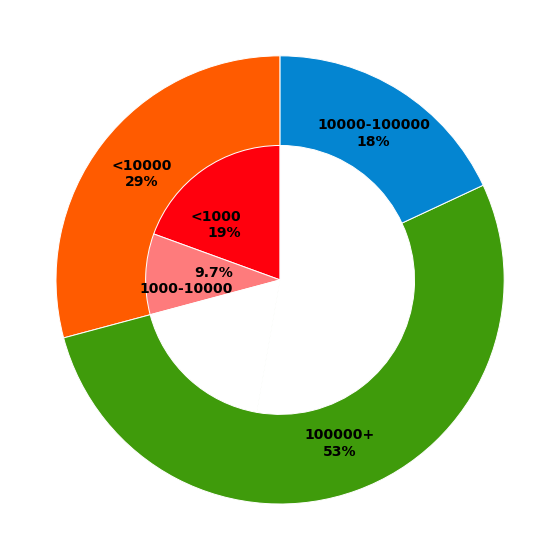

In [37]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=14)

def pie(ax, values, **kwargs):
    total = sum(values)
    def formatter(pct):
        if 28<pct<30:
            return '<10000\n{:0.2g}%'.format(pct)
        elif 17<pct<19:
            return '10000-100000\n{:0.2g}%'.format(pct)
        elif 52<pct<54:
            return '100000+\n{:0.2g}%'.format(pct)
    wedges, _, labels = ax.pie(values, autopct=formatter, **kwargs)
    return wedges

def pie2(ax, values, **kwargs):
    total = sum(values)
    return ax.pie(values, labels=['<1000\n{:0.2g}%'.format(values[0]/total*100),'{:0.2g}%\n1000-10000'.format(values[1]/total*100),'',''], **kwargs)

fig, ax = plt.subplots(figsize=(8,8))
ax.axis('equal')
width = 0.4

kwargs = dict(colors=['xkcd:bright orange',  'xkcd:grass green', 'xkcd:cerulean'], startangle=90, wedgeprops=dict(edgecolor='w'))

outside = pie(ax, sizes, radius=1, pctdistance=(1-width/2)*.97, **kwargs)

kwargs = dict(colors=['xkcd:bright red', 'xkcd:salmon pink','white','white'], startangle=90, wedgeprops=dict(edgecolor='w'))
inside = pie2(ax, [14,7,13,38], radius=1-width, labeldistance=0.5,
             pctdistance=1 - (width/2) / (1-width) * 1.2, **kwargs)
print(inside)
patch = inside[0][1]
angle = (patch.theta2 + patch.theta1) / 2.
x = patch.r * 0.35 * np.cos(angle * np.pi / 180) 
y = patch.r * 0.4 * np.sin(angle * np.pi / 180) *-0.3
print(inside[1][1].get_position())
print(x,y)
inside[1][1].set_position((x,y))

plt.tight_layout()
plt.show()

In [38]:
dump_path='xxxxxx'
dump_database_name='plugin.db'

db = sqlite3.connect(os.path.join(dump_path, dump_database_name))

lst = list(extensions)
read = pd.read_sql(f"SELECT * FROM extensions WHERE id IN (%s)" % (','.join(f"'{id}'" for id in lst)), con=db)
print(len(read))

# for idx, row in read.iterrows():
    
db.close()
read.users = read.users.apply(lambda x: x.replace(' users', '') if 'users' in x else x.strip())
read.reset_index(drop=True, inplace=True)
read.index += 1 
read[['name','id','users']]

72


,name,id,users
1,LM Note Generator For ESPN Fantasy Football,ahcblhpcealjpkmndgmkdnebbjakicno,"1,000+"
2,Picwatermark,aiiimepjikpdipbpmknolbnjbeohbmaa,22
3,Dark Mode - Night Eye,alncdjedloppbablonallfbkeiknmkdi,"200,000+"
4,7TV,ammjkodgmmoknidbanneddgankgfejfh,"900,000+"
5,Neeva Search + Protect for Chrome,aookogakccicaoigoofnnmeclkignpdk,"20,000+"
...,...,...,...
68,InteractiveFics,pcpjpdomcbnlkbghmchnjgeejpdlonli,"100,000+"
69,The Newsroom Beta,pgfokhpgehbmeifbpdhegfnpaahabfja,199
70,買い物ポケット,pgmbeccjfkdbpdjfoldaahpfamjjafma,"500,000+"
71,Global Twitch Emotes,pgniedifoejifjkndekolimjeclnokkb,"100,000+"
